<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) The First Step to Becoming a Data Scientist

## Learn how to uncover hidden patterns in data using Python

## Introduction

Before you build a machine learning model or visualize trends, you must first understand your data. This process is called Exploratory Data Analysis (EDA).

EDA helps you answer important questions:

- What does my data look like

- Are there missing or incorrect values

- Which features are related to each other

- What patterns can I see before modeling

In this guide, we will explore how to perform EDA step by step using Python in Google Colab.

# Step 1 Importing Libraries

First, install and import the necessary libraries.
Open a new Google Colab notebook and run this cell.



In [1]:
# Install required packages if not already available
!pip install pandas matplotlib seaborn

Now import the libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 Loading the Dataset

For demonstration, we will use the Titanic dataset which is popular for learning data analysis.

In [3]:
# Load Titanic dataset directly from Seaborn
df = sns.load_dataset("titanic")

# Display first five rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


This gives a quick view of the data. You can see columns like `age`, `sex`, `class`, and whether a passenger survived.

# Step 3 Understanding the Data

Before analyzing, check the structure and summary of the dataset.

In [4]:
# Basic info
df.info()

# Summary statistics
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- `info()` shows column names, data types, and missing values.
- `describe()` provides statistical details like mean, median, and standard deviation for numerical columns.

# Step 4 Checking for Missing Data

Missing values can distort analysis and model results. Let us check and visualize them.

In [5]:
# Count missing values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


To visualize missing data:

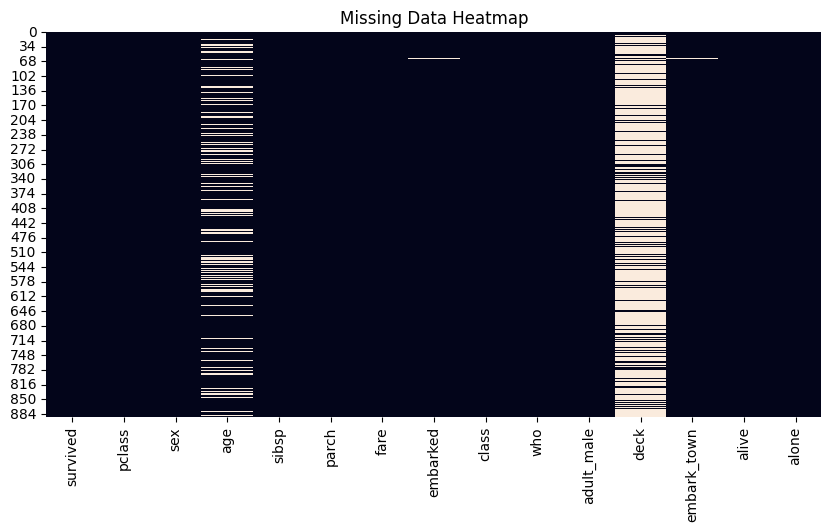

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

You can now decide whether to fill or drop missing values based on this.

# Step 5 Univariate Analysis

Univariate analysis means analyzing one variable at a time.

## Example 1: Categorical Data

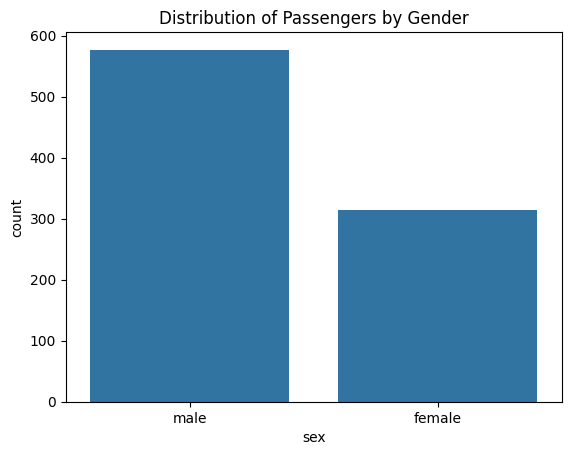

In [7]:
sns.countplot(data=df, x="sex")
plt.title("Distribution of Passengers by Gender")
plt.show()

This shows how many male and female passengers were on board.

## Example 2: Numerical Data

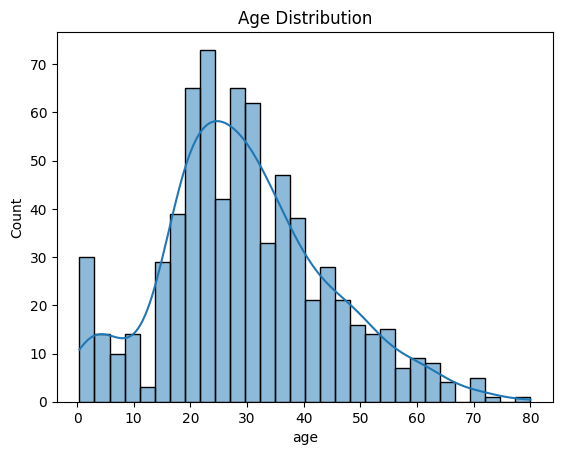

In [8]:
sns.histplot(df["age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

This helps you see how age is distributed and whether it is skewed.

# Step 6 Bivariate Analysis

Now let’s study the relationship between two variables.

## Example 1: Survival by Gender

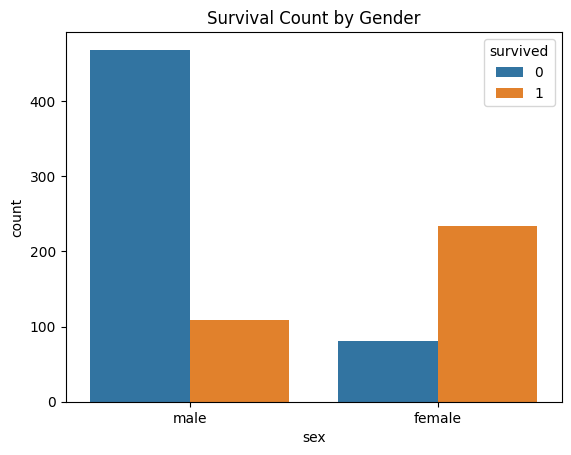

In [9]:
sns.countplot(data=df, x="sex", hue="survived")
plt.title("Survival Count by Gender")
plt.show()

You can clearly see that survival chances differ between genders.

## Example 2: Survival by Passenger Class

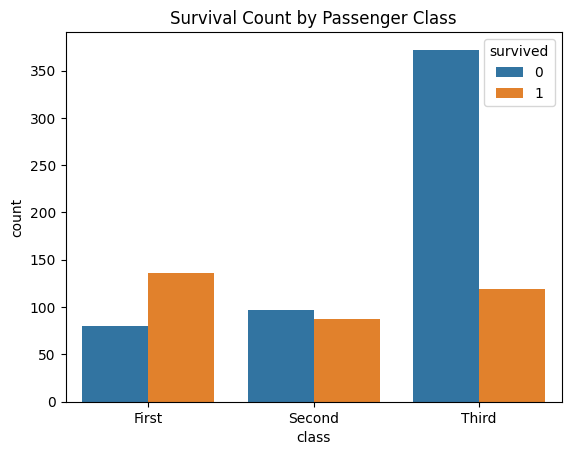

In [10]:
sns.countplot(data=df, x="class", hue="survived")
plt.title("Survival Count by Passenger Class")
plt.show()

This shows how class (first, second, third) relates to survival probability.

# Step 7 Correlation Analysis

Correlation helps you identify relationships between numerical variables.

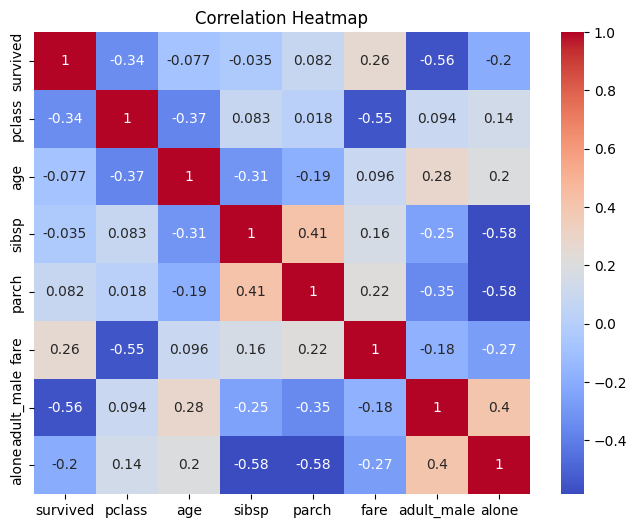

In [11]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

A positive correlation means two variables increase together, while a negative one means when one increases, the other decreases.

# Step 8 Outlier Detection

Outliers can affect model performance and skew results.
A boxplot is a quick way to detect them.

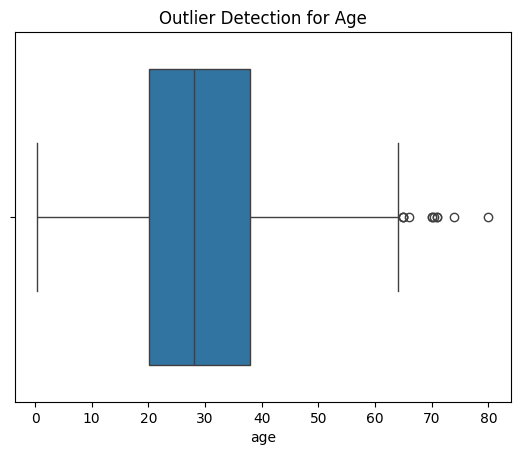

In [12]:
sns.boxplot(data=df, x="age")
plt.title("Outlier Detection for Age")
plt.show()

If you see points far away from the main box, they may be outliers.

# Step 9 Handling Missing Values

You can handle missing data in multiple ways.
For example, fill missing ages with the mean value.

In [13]:
df["age"].fillna(df["age"].mean(), inplace=True)

/tmp/ipython-input-3091909107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].mean(), inplace=True)


Or drop rows with too many missing values.

In [14]:
df.dropna(subset=["embarked"], inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Step 10 Summary of Insights

After exploring the Titanic dataset, you can summarize:

- Most passengers were male

- Passengers in first class had higher survival chances

- There were some missing ages which we filled with the mean

- Age and fare showed a mild correlation

# Conclusion

Exploratory Data Analysis is the foundation of every data science project. It helps you understand what your data says before applying complex models.

By learning how to clean, visualize, and summarize data, you are already thinking like a data scientist.

Open your Colab notebook, load a new dataset, and start exploring. The more datasets you analyze, the better you will get at finding insights hidden in raw numbers.